<a href="https://colab.research.google.com/github/ChaosShadoww/MarketAnomaly/blob/main/MarketAnomalyDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial dataset shape:  (1149, 60)
     Unnamed: 0 Unnamed: 1     Ticker  XAU BGNL Curncy  ECSURPUS Index  \
0           NaN        NaN        NaN           284.25             NaN   
1           NaN        NaN  4/27/1999           282.25             NaN   
2         Depth    ED-22AY   5/4/1999           285.55             NaN   
3          Date    PX_Last  5/11/1999           278.25             NaN   
4  Days (T/W/A)          W  5/18/1999           273.95             NaN   

   BDIY Index  CRY Index  DXY Curncy  JPY Curncy  GBP Curncy  ...  TY1 Comdty  \
0         NaN        NaN         NaN         NaN         NaN  ...         NaN   
1       995.0     134.65      100.63      120.44       1.617  ...     115.563   
2      1095.0     139.04      100.68      120.77       1.626  ...     114.313   
3      1121.0     136.78      100.24      121.07       1.621  ...     113.344   
4      1061.0     133.90      100.72      123.21       1.621  ...     112.344   

   GC1 Comdty  CO1 Comdty  ES1 In

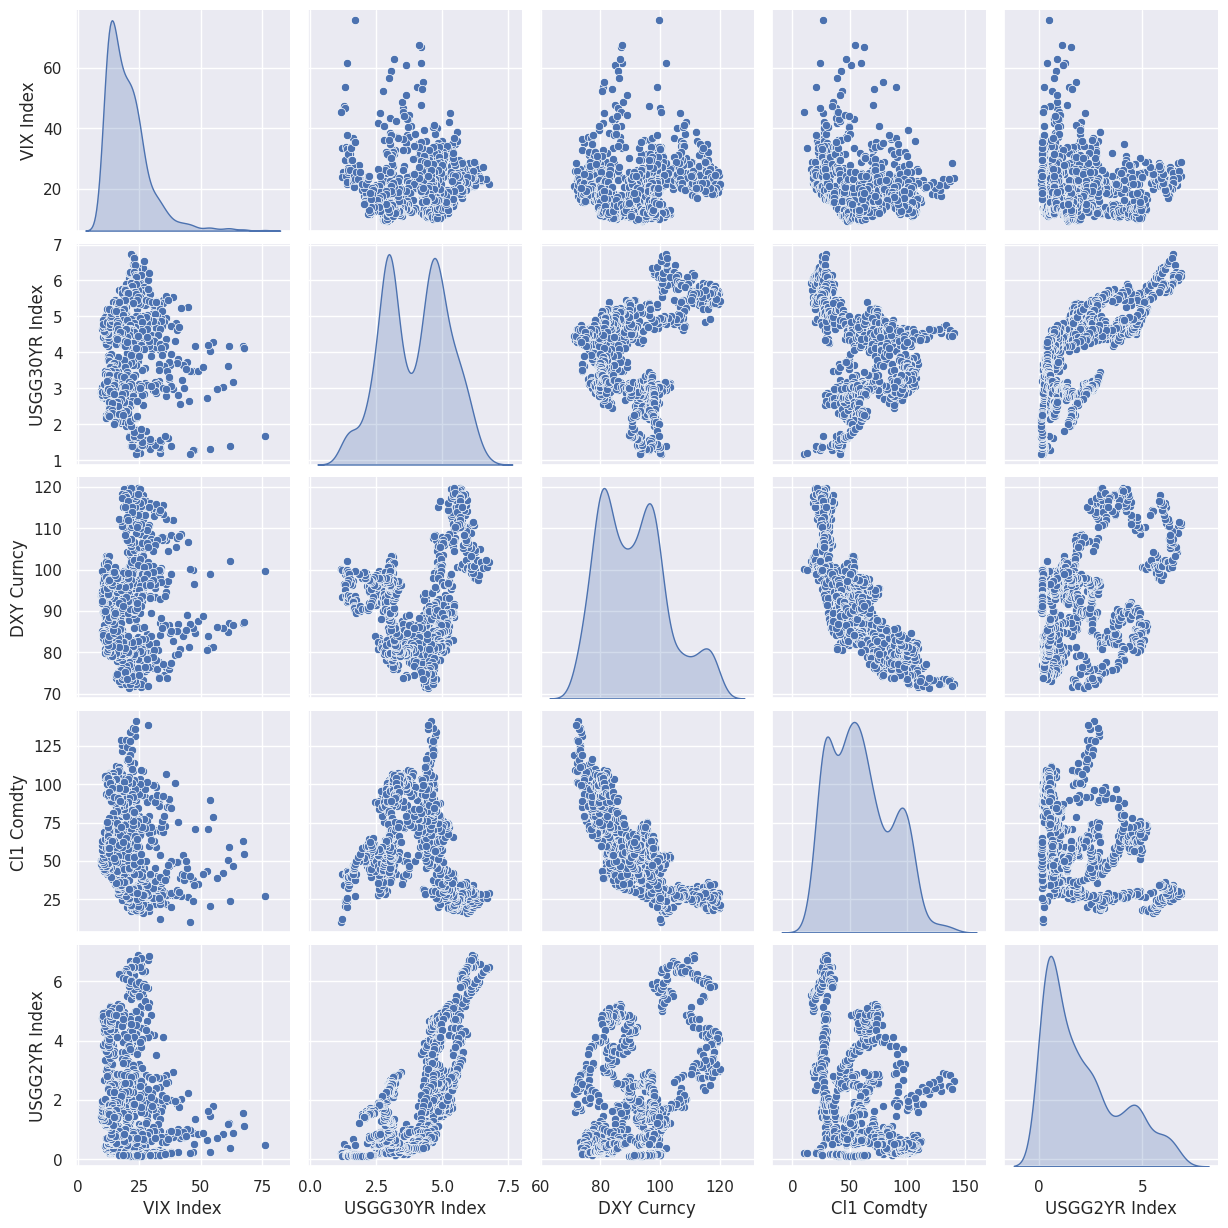

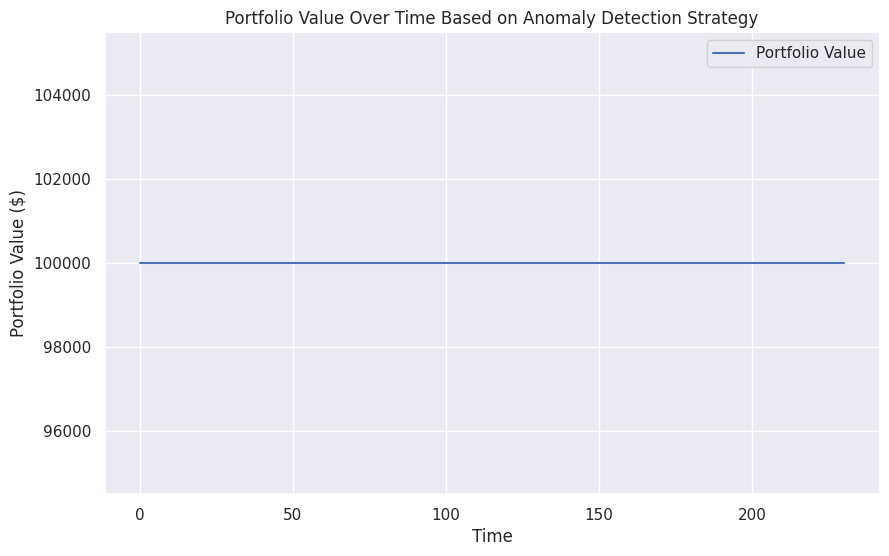

Initial cash: $100000, Final portfolio value: $100000
Return on Investment (ROI): 0.00%

Welcome to the AI Investment Strategy Bot!
I can help explain the strategy and provide insights into the investment outcomes.
Type 'exit' to quit the conversation at any time.



KeyboardInterrupt: Interrupted by user

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Enable inline plotting
sns.set(color_codes=True)

# Load the financial market dataset
file_path = '/content/drive/My Drive/FinancialMarketData.csv'  
df = pd.read_csv(file_path, header=5)  

# Display initial rows and column information
print("Initial dataset shape: ", df.shape)
print(df.head(5))
print(df.info())

# Focus on relevant columns (exclude 'CrashLabel' since it does not exist)
relevant_columns = [
    'VIX Index', 'USGG30YR Index', 'DXY Curncy',
    'Cl1 Comdty', 'USGG2YR Index'
]

# Check for missing relevant columns
missing_columns = [col for col in relevant_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns: {missing_columns}")
else:
    df = df[relevant_columns]

# Data cleaning
df = df.drop_duplicates()
df = df.dropna()

# Exploratory Data Analysis
sns.pairplot(df, diag_kind='kde')
plt.show()

# Feature-target split (No target column, so we focus on unsupervised learning)
X = df  # No target label, so we use the features for anomaly detection

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training with Isolation Forest
model = IsolationForest(random_state=42, n_estimators=100)
model.fit(X_train_scaled)

# Predict anomalies (1 = normal, -1 = anomaly)
preds = model.predict(X_test_scaled)
preds = np.where(preds == 1, 0, 1)  # Convert to binary (0 = normal, 1 = anomaly)

# Implement investment strategy based on model's predictions
initial_cash = 100000  # Assume starting with $100,000
cash = initial_cash
investment = 0
portfolio_value = [initial_cash]

# Simulate investment strategy
for i in range(len(preds)):
    if preds[i] == 0 and cash > 0:  # If normal and we have cash, buy
        investment = cash
        cash = 0
    elif preds[i] == 1 and investment > 0:  # If anomaly and we have invested, sell
        cash = investment
        investment = 0
    portfolio_value.append(cash + investment)

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label="Portfolio Value")
plt.title("Portfolio Value Over Time Based on Anomaly Detection Strategy")
plt.xlabel("Time")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()

# Final portfolio value
final_value = portfolio_value[-1]
return_on_investment = (final_value - initial_cash) / initial_cash * 100
print(f"Initial cash: ${initial_cash}, Final portfolio value: ${final_value}")
print(f"Return on Investment (ROI): {return_on_investment:.2f}%")

# Optional: Evaluate model's prediction performance (only if labels exist for comparison)
# print(classification_report(y_test, preds))
# print(confusion_matrix(y_test, preds))

# AI-driven bot for user interaction
def ai_bot():
    print("\nWelcome to the AI Investment Strategy Bot!")
    print("I can help explain the strategy and provide insights into the investment outcomes.")
    print("Type 'exit' to quit the conversation at any time.\n")

    while True:
        user_input = input("You: ").strip().lower()
        if user_input == "exit":
            print("Bot: Thank you for using the AI Investment Strategy Bot. Goodbye!")
            break
        elif "strategy" in user_input:
            print("Bot: The investment strategy identifies 'normal' data points as potential investments and avoids anomalies, minimizing risk.")
        elif "performance" in user_input:
            print(f"Bot: The total return from the portfolio is ${final_value:.2f}, with an ROI of {return_on_investment:.2f}%.")
        elif "portfolio" in user_input:
            print(f"Bot: The portfolio value over time peaked at ${max(portfolio_value):.2f}.")
        elif "anomalies" in user_input:
            print("Bot: Anomalies are considered risky points and are avoided in the investment strategy to minimize losses.")
        else:
            print("Bot: I'm sorry, I didn't understand that. You can ask about the strategy, performance, portfolio, or anomalies.")

# Run the bot
ai_bot()
